 # QCTO - Workplace Module

<h1 style="color:darkgreen;">Avocado Prices and Sales Volume Analysis (2015-2023)</h1>


## Done By: Mahlatse Lelosa
© ExploreAI 2024

Githubrepo :https://github.com/mahlatselelosa/Avocado-Prices-and-Sales-Volume-Analysis-2015-2023-.git

Trello:  https://trello.com/invite/b/66e22a87303a32b16b7ca73f/ATTI782e1085c86e71013b90d6b822834bf69E6801DF/mahlatse

![](avocado.png)


# <span style="color:darkgreen;">Table of Contents</span>

1. [<span style="color:darkgreen;">Problem Statement</span>](#ProblemStatement)
2. [<span style="color:darkgreen;">Introduction</span>](#introduction)
3. [<span style="color:darkgreen;">Importing Packages</span>](#importing-packages)
4. [<span style="color:darkgreen;">Data Collection and Description</span>](#data-collection-and-description)
5. [<span style="color:darkgreen;">Loading Data</span>](#loading-data)
6. [<span style="color:darkgreen;">Data Cleaning and Filtering</span>](#data-cleaning-and-filtering)
7. [<span style="color:darkgreen;">Exploratory Data Analysis (EDA)</span>](#exploratory-data-analysis-eda)
8. [<span style="color:darkgreen;">Modeling</span>](#modeling)
9. [<span style="color:darkgreen;">Evaluation and Validation</span>](#evaluation-and-validation)
10. [<span style="color:darkgreen;">Final Model</span>](#final-model)
11. [<span style="color:darkgreen;">Conclusion and Future Work</span>](#conclusion-and-future-work)
12. [<span style="color:darkgreen;">References</span>](#references)


<h2 id="Problem Statement" style="color:darkgreen;">Problem Statement</h2>

The increasing demand for avocados has led to fluctuations in market prices, creating challenges for both consumers and producers. The ability to accurately predict avocado prices can provide valuable insights for stakeholders, enabling them to make informed purchasing and selling decisions. This project aims to develop a predictive model that accurately forecasts avocado prices based on various features.

<h2 id="introduction" style="color:darkgreen;">Introduction</h2>

Avocados have gained immense popularity worldwide, contributing to their volatile market prices. Traditional methods of price prediction often rely on historical data and basic statistical techniques, which may not capture the complexities of market dynamics. With the advent of machine learning, it is possible to leverage more sophisticated algorithms to improve the accuracy of price predictions. This project utilizes various regression techniques, including Linear Regression, Gradient Boosting, and Random Forest Regressor, to develop a model that predicts avocado prices based on relevant features.


<h2 id="importing-packages" style="color:darkgreen;">Importing Packages</h2>


Set up the Python environment with necessary libraries and tools.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


<h2 id="data-collection-and-description" style="color:darkgreen;">Data Collection and Description</h2>

> Data Collection

 The avocado price dataset was sourced from  Kaggle.

 > Description

 The dataset includes the following features:

Date: 
The date of the observation.

Region:
 The geographic area where avocados were sold.
 
Type: 
Classification of avocados (conventional vs. organic).

Price: The average price of avocados per unit.


<h2 id="loading-data" style="color:darkgreen;">Loading Data</h2>

In [2]:
# Loading the dataset
df = pd.read_csv('avocado.csv')
# Displaying the first few rows
print(df.head())


         Date  AveragePrice  TotalVolume    plu4046    plu4225   plu4770  \
0  2015-01-04          1.22     40873.28    2819.50   28287.42     49.90   
1  2015-01-04          1.79      1373.95      57.42     153.88      0.00   
2  2015-01-04          1.00    435021.49  364302.39   23821.16     82.15   
3  2015-01-04          1.76      3846.69    1500.15     938.35      0.00   
4  2015-01-04          1.08    788025.06   53987.31  552906.04  39995.03   

   TotalBags  SmallBags  LargeBags  XLargeBags          type  \
0    9716.46    9186.93     529.53         0.0  conventional   
1    1162.65    1162.65       0.00         0.0       organic   
2   46815.79   16707.15   30108.64         0.0  conventional   
3    1408.19    1071.35     336.84         0.0       organic   
4  141136.68  137146.07    3990.61         0.0  conventional   

                region  
0               Albany  
1               Albany  
2              Atlanta  
3              Atlanta  
4  BaltimoreWashington  


In [3]:
import pandas as pd

# Load the dataset
data_path = 'avocado.csv'  # Update with your file path
avocado_df = pd.read_csv(data_path)

# Inspect the data
print(avocado_df.head())
print(avocado_df.info())
print(avocado_df.describe())


         Date  AveragePrice  TotalVolume    plu4046    plu4225   plu4770  \
0  2015-01-04          1.22     40873.28    2819.50   28287.42     49.90   
1  2015-01-04          1.79      1373.95      57.42     153.88      0.00   
2  2015-01-04          1.00    435021.49  364302.39   23821.16     82.15   
3  2015-01-04          1.76      3846.69    1500.15     938.35      0.00   
4  2015-01-04          1.08    788025.06   53987.31  552906.04  39995.03   

   TotalBags  SmallBags  LargeBags  XLargeBags          type  \
0    9716.46    9186.93     529.53         0.0  conventional   
1    1162.65    1162.65       0.00         0.0       organic   
2   46815.79   16707.15   30108.64         0.0  conventional   
3    1408.19    1071.35     336.84         0.0       organic   
4  141136.68  137146.07    3990.61         0.0  conventional   

                region  
0               Albany  
1               Albany  
2              Atlanta  
3              Atlanta  
4  BaltimoreWashington  
<class '

<h2 id="data-cleaning-and-filtering" style="color:darkgreen;">Data Cleaning and Filtering</h2>

Inspect the Data
Check the initial state of the data

In [4]:
# Check the data types and non-null values
df.info()

# Check for missing values
df.isnull().sum()

# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          53415 non-null  object 
 1   AveragePrice  53415 non-null  float64
 2   TotalVolume   53415 non-null  float64
 3   plu4046       53415 non-null  float64
 4   plu4225       53415 non-null  float64
 5   plu4770       53415 non-null  float64
 6   TotalBags     53415 non-null  float64
 7   SmallBags     41025 non-null  float64
 8   LargeBags     41025 non-null  float64
 9   XLargeBags    41025 non-null  float64
 10  type          53415 non-null  object 
 11  region        53415 non-null  object 
dtypes: float64(9), object(3)
memory usage: 4.9+ MB


AveragePrice   TotalVolume       plu4046       plu4225       plu4770  \
count  53415.000000  5.341500e+04  5.341500e+04  5.341500e+04  5.341500e+04   
mean       1.428910  8.694474e+05  2.982707e+05  2.222170e+05  2.053195e+04   
std        0.393116  3.545274e+06  1.307669e+06  9.554624e+05  1.040977e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.119091  1.626465e+04  6.947250e+02  2.120800e+03  0.000000e+00   
50%        1.400000  1.203525e+05  1.458058e+04  1.751663e+04  9.005000e+01   
75%        1.690000  4.542380e+05  1.287924e+05  9.351560e+04  3.599735e+03   
max        3.440830  6.103446e+07  2.544720e+07  2.047057e+07  2.860025e+06   

          TotalBags     SmallBags     LargeBags     XLargeBags  
count  5.341500e+04  4.102500e+04  4.102500e+04   41025.000000  
mean   2.175083e+05  1.039222e+05  2.331316e+04    2731.811796  
std    8.676947e+05  5.692608e+05  1.496622e+05   22589.096454  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000  
25%    7.846520e+03  0.000000e+00  0.000000e+00       0.000000  
50%    3.695310e+04  6.945800e+02  0.000000e+00       0.000000  
75%    1.110146e+05  3.795298e+04  2.814920e+03       0.000000  
max    1.629830e+07  1.256716e+07  4.324231e+06  679586.800000

In [5]:
import pandas as pd

# Load the dataset
avocado_df = pd.read_csv('avocado.csv')

# Convert 'Date' to datetime format
avocado_df['Date'] = pd.to_datetime(avocado_df['Date'])

# Create new columns for year, month, and day of the week
avocado_df['Year'] = avocado_df['Date'].dt.year
avocado_df['Month'] = avocado_df['Date'].dt.month
avocado_df['DayOfWeek'] = avocado_df['Date'].dt.day_name()

# Check for missing values
missing_values = avocado_df.isnull().sum()

print("Missing Values:\n", missing_values)
print(avocado_df.head())


Missing Values:
 Date                0
AveragePrice        0
TotalVolume         0
plu4046             0
plu4225             0
plu4770             0
TotalBags           0
SmallBags       12390
LargeBags       12390
XLargeBags      12390
type                0
region              0
Year                0
Month               0
DayOfWeek           0
dtype: int64
        Date  AveragePrice  TotalVolume    plu4046    plu4225   plu4770  \
0 2015-01-04          1.22     40873.28    2819.50   28287.42     49.90   
1 2015-01-04          1.79      1373.95      57.42     153.88      0.00   
2 2015-01-04          1.00    435021.49  364302.39   23821.16     82.15   
3 2015-01-04          1.76      3846.69    1500.15     938.35      0.00   
4 2015-01-04          1.08    788025.06   53987.31  552906.04  39995.03   

   TotalBags  SmallBags  LargeBags  XLargeBags          type  \
0    9716.46    9186.93     529.53         0.0  conventional   
1    1162.65    1162.65       0.00         0.0       organic 

#### Handle Missing Values
Decide how to handle missing values: removal, imputation

In [6]:
print(df.isnull().sum())


Date                0
AveragePrice        0
TotalVolume         0
plu4046             0
plu4225             0
plu4770             0
TotalBags           0
SmallBags       12390
LargeBags       12390
XLargeBags      12390
type                0
region              0
dtype: int64


I have missing values in the columns SmallBags, LargeBags, and XLargeBags, with 12,390 missing values in each. Since there are no missing values in the other columns, I will handle these missing values without dropping rows.

Handling Missing Values:
Fill with a Default Value: I will fill the missing values with 0, assuming that missing values mean no bags were sold for that category

In [7]:
# Filling missing values in bag columns with 0
df_cleaned = df.copy()  # Create a cleaned copy of the original dataframe
df_cleaned['SmallBags'].fillna(0, inplace=True)
df_cleaned['LargeBags'].fillna(0, inplace=True)
df_cleaned['XLargeBags'].fillna(0, inplace=True)

# Verify missing values are handled
print(df_cleaned.isnull().sum())



Date            0
AveragePrice    0
TotalVolume     0
plu4046         0
plu4225         0
plu4770         0
TotalBags       0
SmallBags       0
LargeBags       0
XLargeBags      0
type            0
region          0
dtype: int64


#### Remove Duplicates

In [8]:
# Remove duplicate rows
duplicates = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

df_cleaned = df_cleaned.drop_duplicates()

# Check the shape of the data after removing duplicates
print(df_cleaned.shape)



Number of duplicate rows: 0
(53415, 12)


#### Correct Data Types

 Convert columns to their appropriate data types. For example, the Date column should be in datetime format, and AveragePrice should be a float

In [9]:
# Convert 'Date' to datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# Convert 'AveragePrice' to float
df_cleaned['AveragePrice'] = df_cleaned['AveragePrice'].astype(float)

# Verify the changes
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          53415 non-null  datetime64[ns]
 1   AveragePrice  53415 non-null  float64       
 2   TotalVolume   53415 non-null  float64       
 3   plu4046       53415 non-null  float64       
 4   plu4225       53415 non-null  float64       
 5   plu4770       53415 non-null  float64       
 6   TotalBags     53415 non-null  float64       
 7   SmallBags     53415 non-null  float64       
 8   LargeBags     53415 non-null  float64       
 9   XLargeBags    53415 non-null  float64       
 10  type          53415 non-null  object        
 11  region        53415 non-null  object        
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 4.9+ MB


In [10]:
# Convert 'Date' column to datetime format (if not already done)
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# Extract useful components from the 'Date' column
df_cleaned['Year'] = df_cleaned['Date'].dt.year
df_cleaned['Month'] = df_cleaned['Date'].dt.month
df_cleaned['Day'] = df_cleaned['Date'].dt.day

# Alternatively, you can convert the 'Date' column to a numerical value (ordinal)
df_cleaned['Date_ordinal'] = df_cleaned['Date'].map(lambda x: x.toordinal())

# Drop the original 'Date' column if not needed
df_cleaned = df_cleaned.drop(columns=['Date'])


### Check for Categorical Variables

In [11]:
# Use one-hot encoding for categorical variables
df_cleaned = pd.get_dummies(df_cleaned, columns=['type', 'region'], drop_first=True)


#### Filter Outliers

Outliers can distort statistical analyses and model performance. A common way to detect outliers is using the Z-score method

In [12]:
from scipy import stats

# Calculate Z-scores for numerical columns
z_scores = np.abs(stats.zscore(df_cleaned.select_dtypes(include=[np.number])))

# Keep only rows where Z-score is less than 3 (commonly used threshold)
df_cleaned = df_cleaned[(z_scores < 3).all(axis=1)]

# Check the shape of the data after filtering outliers
print(df_cleaned.shape)



(51731, 73)


#### Feature Engineering

Create new features to enhance your analysis. For example, extracting Year and Month from the Date column can help in time-series analysis.



In [13]:
# Reshape the DataFrame from wide to long format
df_long = pd.melt(df_cleaned, 
                  id_vars=['AveragePrice', 'TotalVolume'], 
                  value_vars=[col for col in df_cleaned.columns if col.startswith('region_')], 
                  var_name='region', 
                  value_name='is_present')

# Filter only rows where 'is_present' is 1 (i.e., region is valid for that row)
df_long = df_long[df_long['is_present'] == 1]

# Remove 'region_' prefix from the 'region' column
df_long['region'] = df_long['region'].str.replace('region_', '')


In [14]:
# Convert 'Year', 'Month', and 'Day' into a single datetime column
df_cleaned['Date'] = pd.to_datetime(df_cleaned[['Year', 'Month', 'Day']])

# Now you can plot using the 'Date' column


#### Data Normalization/Standardization




In [15]:
from sklearn.preprocessing import StandardScaler

# Standardize 'AveragePrice' and 'TotalVolume' columns
scaler = StandardScaler()
df_cleaned[['AveragePrice', 'TotalVolume']] = scaler.fit_transform(df_cleaned[['AveragePrice', 'TotalVolume']])

# Verify the scaled values
print(df_cleaned[['AveragePrice', 'TotalVolume']].head())


   AveragePrice  TotalVolume
0     -0.551432    -0.414980
1      0.936108    -0.452494
2     -1.125571    -0.040647
3      0.857817    -0.450145
4     -0.916793     0.294609


This shows that:

Values of AveragePrice and TotalVolume are standardized.
Negative values indicate that the original data points were below the mean.
Positive values indicate the original data points were above the mean

In [16]:
# Display the final cleaned dataset
print(df_cleaned.head())

# Check the shape of the cleaned dataset
print(df_cleaned.shape)


   AveragePrice  TotalVolume    plu4046    plu4225   plu4770  TotalBags  \
0     -0.551432    -0.414980    2819.50   28287.42     49.90    9716.46   
1      0.936108    -0.452494      57.42     153.88      0.00    1162.65   
2     -1.125571    -0.040647  364302.39   23821.16     82.15   46815.79   
3      0.857817    -0.450145    1500.15     938.35      0.00    1408.19   
4     -0.916793     0.294609   53987.31  552906.04  39995.03  141136.68   

   SmallBags  LargeBags  XLargeBags  Year  ...  region_Spokane  \
0    9186.93     529.53         0.0  2015  ...           False   
1    1162.65       0.00         0.0  2015  ...           False   
2   16707.15   30108.64         0.0  2015  ...           False   
3    1071.35     336.84         0.0  2015  ...           False   
4  137146.07    3990.61         0.0  2015  ...           False   

   region_StLouis  region_Syracuse  region_Tampa  region_Toledo  \
0           False            False         False          False   
1           False 

Results:

A cleaned dataset with 51,731 rows and 14 columns.

The AveragePrice and TotalVolume columns are standardized, as seen in the transformed values.

The rest of the columns (plu4046, plu4225, plu4770, TotalBags, etc.) retain their original values.

In [17]:
import os

# Define the directory and file path
directory = 'data'
cleaned_data_path = os.path.join(directory, 'cleaned_avocado_data.csv')

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the cleaned DataFrame to CSV
df_cleaned.to_csv(cleaned_data_path, index=False)

print(f"Cleaned data saved to {cleaned_data_path}")


Cleaned data saved to data\cleaned_avocado_data.csv


<h2 id="exploratory-data-analysis-eda" style="color:darkgreen;">Exploratory Data Analysis (EDA)</h2>


#### Summary Statistics and Data Distribution



       AveragePrice   TotalVolume       plu4046       plu4225        plu4770  \
count  5.173100e+04  5.173100e+04  5.173100e+04  5.173100e+04   51731.000000   
mean  -5.260634e-16 -1.909212e-17  1.598492e+05  1.203970e+05    8962.873793   
min   -2.587014e+00 -4.537184e-01  0.000000e+00  0.000000e+00       0.000000   
25%   -8.007127e-01 -4.388505e-01  6.494000e+02  1.984905e+03       0.000000   
50%   -5.558543e-02 -3.461652e-01  1.260422e+04  1.581498e+04      76.230000   
75%    6.848039e-01 -6.474168e-02  1.161193e+05  8.109242e+04    2863.985000   
max    3.067125e+00  8.900824e+00  4.170011e+06  3.086785e+06  331336.660000   
std    1.000010e+00  1.000010e+00  4.354483e+05  3.116059e+05   30052.954105   

          TotalBags     SmallBags      LargeBags    XLargeBags          Year  \
count  5.173100e+04  5.173100e+04   51731.000000  51731.000000  51731.000000   
mean   1.216317e+05  3.906842e+04    7634.380051    804.959460   2019.063192   
min    0.000000e+00  0.000000e+00      

c:\Users\mahla\.conda\envs\kaelo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


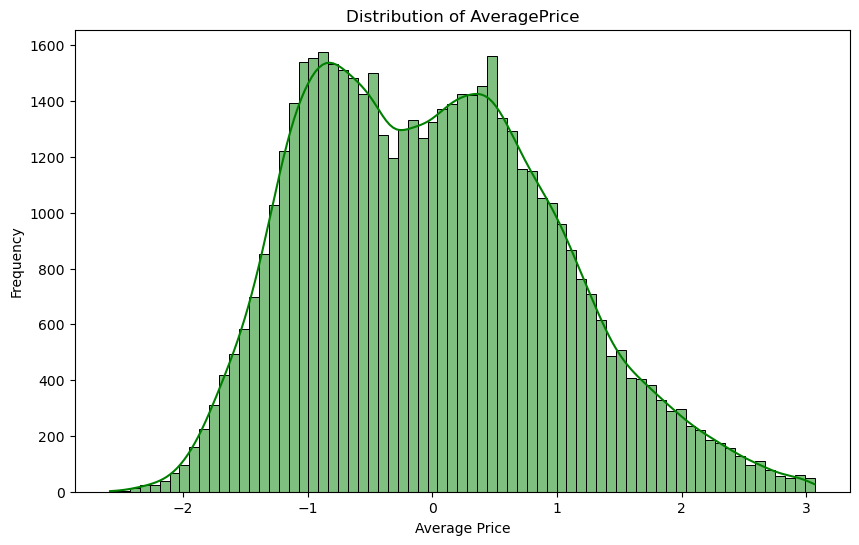

c:\Users\mahla\.conda\envs\kaelo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


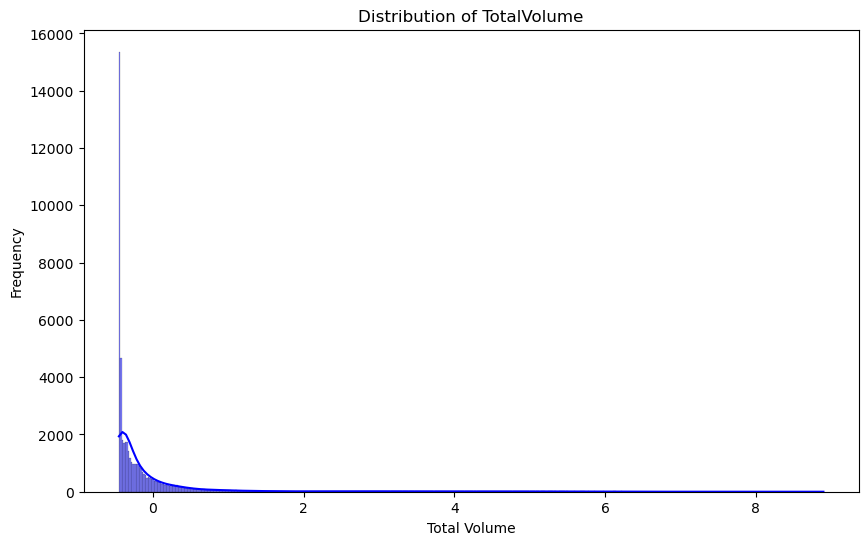

In [18]:
# Display summary statistics
print(df_cleaned.describe())

# Checking the distribution of 'AveragePrice' and 'TotalVolume'
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for 'AveragePrice'
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['AveragePrice'], kde=True, color='green')
plt.title('Distribution of AveragePrice')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()

# Histogram for 'TotalVolume'
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['TotalVolume'], kde=True, color='blue')
plt.title('Distribution of TotalVolume')
plt.xlabel('Total Volume')
plt.ylabel('Frequency')
plt.show()


##### Interpretation

>Distribution of AveragePrice

Shape: 
The distribution is approximately normal but slightly skewed to the right, indicating that most average prices are clustered around the center, with fewer higher values.

Central Tendency: 
The peak of the histogram is around 0 on the ‘Average Price’ axis, suggesting that this is the most common average price in your dataset.

Spread: 
The data is spread out across a range of average prices, with the frequency decreasing as you move away from the center.

>Distribution of TotalVolume
The graph shows a right-skewed distribution of total volume

Peak at Low Volumes:
 The majority of the data points are clustered at the lower end of the total volume range.

Long Tail: 
There is a long tail extending to the right, indicating a few instances of very high total volumes.

Frequency Decline: 
The frequency of occurrences drops sharply as the total volume increases.

#### Distribution of Avocado Types

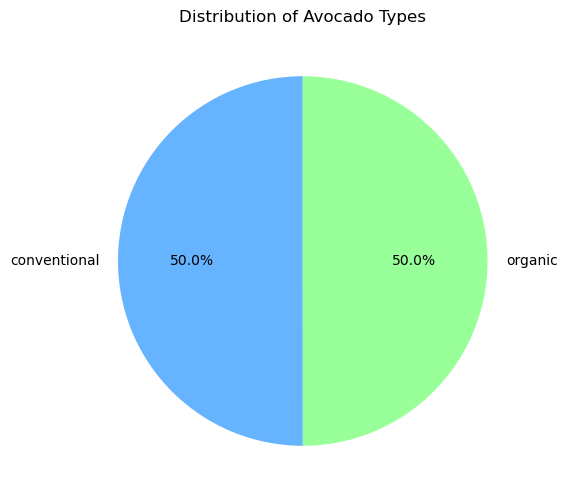

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Count the occurrences of each avocado type
type_counts = df['type'].value_counts()

# Step 2: Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
plt.title('Distribution of Avocado Types')
plt.show()


#### Interpretation

 shows an equal split between conventional and organic avocados, each making up 50% of the total. This indicates that both types have an equal market share or presence in the dataset represented by the chart.

#### Total Avocado Volume Over time

In [20]:
import plotly.express as px

# Assuming df_cleaned is your cleaned DataFrame
fig = px.line(df_cleaned, x='Date', y='TotalVolume', title='Total Avocado Volume Over Time', markers=True)
fig.update_layout(xaxis_title='Date', yaxis_title='Total Volume')
fig.show()


##### Interpretation

Trend Overview: 
The graph shows the total volume of avocados from 2015 to 2024. There are noticeable fluctuations, indicating variability in production or sales over the years.

Peaks and Troughs:
 Significant peaks can be seen around 2017 and 2021, suggesting higher avocado volumes during these years. Conversely, there are troughs around 2018 and 2023, indicating lower volumes.
 
Overall Pattern: 
Despite the fluctuations, there seems to be a general upward trend in avocado volume over the given period, suggesting an increase in production or demand.

 ### Visualizing Relationships between Variables
 
Now, let's examine the relationship between AveragePrice and TotalVolume

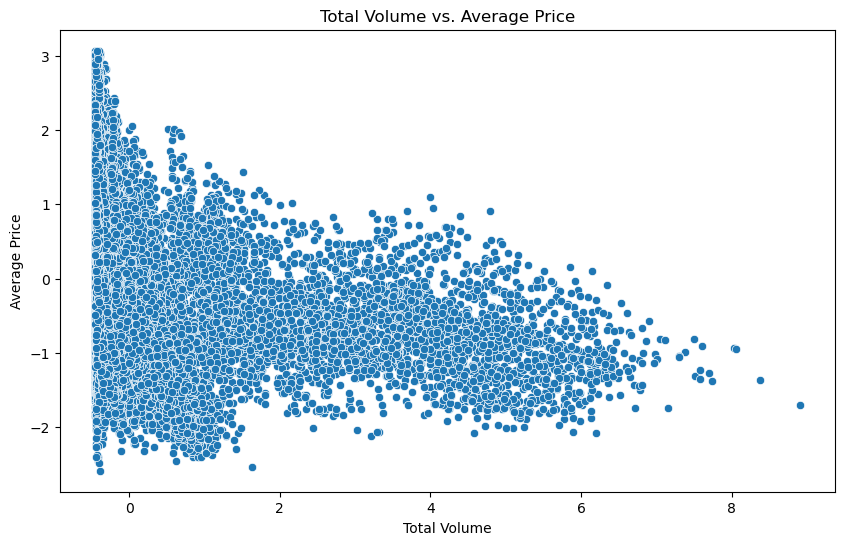

In [21]:
# Scatter plot between 'AveragePrice' and 'TotalVolume'
plt.figure(figsize=(10,6))
sns.scatterplot(x='TotalVolume', y='AveragePrice', data=df_cleaned)
plt.title('Total Volume vs. Average Price')
plt.xlabel('Total Volume')
plt.ylabel('Average Price')
plt.show()


##### Interpretation:

The scatter plot illustrates the relationship between total volume and average price. Based on the data points, there seems to be a negative correlation between these two variables. This means that as the total volume increases, the average price tends to decrease.

The blue dots are densely packed at the lower end of the Total Volume axis and spread out towards the higher end, reinforcing this trend.

 ### Time Series Analysis
 
Since the dataset includes dates, it’s important to analyze how prices and sales volumes changed over time.

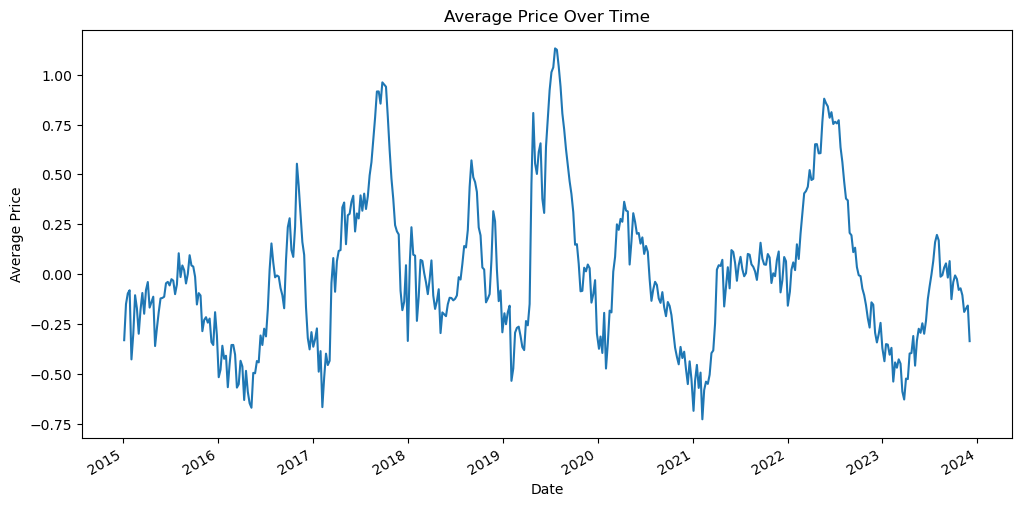

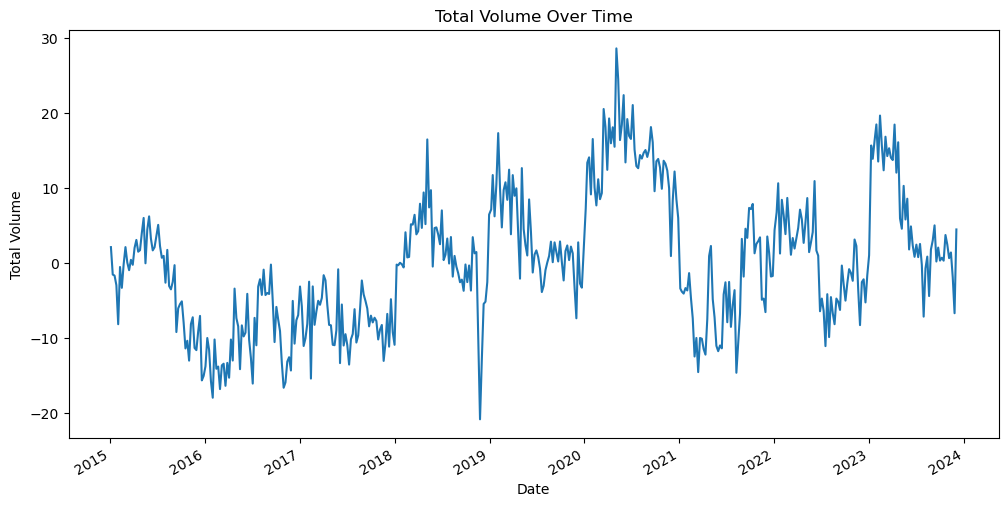

In [22]:
# Line plot of AveragePrice over time
plt.figure(figsize=(12,6))
df_cleaned.groupby('Date')['AveragePrice'].mean().plot()
plt.title('Average Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

# Line plot of TotalVolume over time
plt.figure(figsize=(12,6))
df_cleaned.groupby('Date')['TotalVolume'].sum().plot()
plt.title('Total Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Total Volume')
plt.show()


##### Interpretation:

>Average Price Over Time
shows the fluctuation of average prices from 2015 to 2024

Significant Variability:
 The average price fluctuates significantly, with multiple peaks and troughs.

Trends: 
There are periods of both rising and falling prices, indicating potential cycles or seasonal effects.

Recent Stability:
 In the last few years, the prices seem to stabilize around the 0.00 mark.

 >Total Volume Over Time
 shows the fluctuations in total volume from 2015 to 2024

 Peaks and Troughs:
  The graph displays several peaks and troughs, indicating significant variability in the data over time.

Trends: 
There are periods of both increase and decrease, suggesting cyclical or seasonal patterns.

Recent Data:
 The most recent data points show a downward trend, which might indicate a decline in total volume.

 ### Regional Analysis
 
Let's look at how AveragePrice and TotalVolume vary by region

Box plot for AveragePrice by region

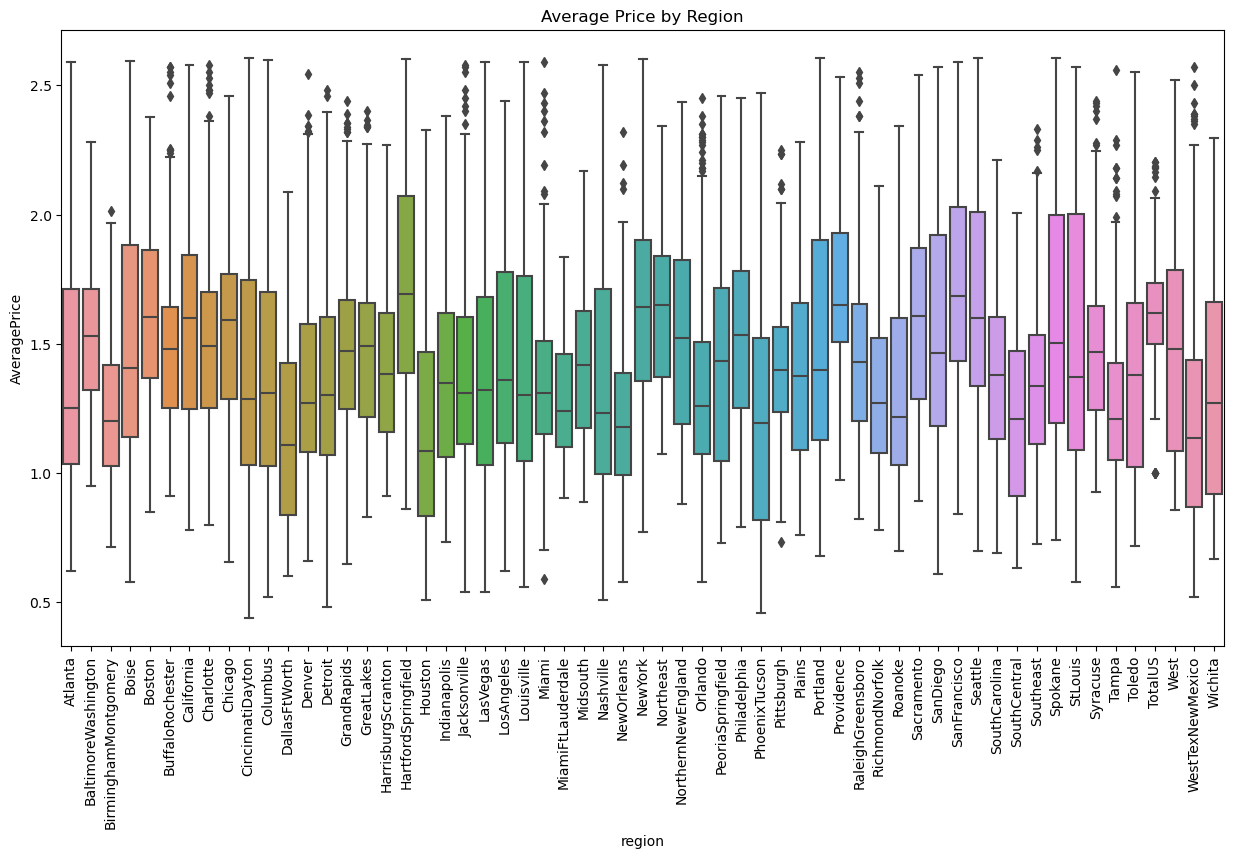

In [23]:
plt.figure(figsize=(15,8))
sns.boxplot(x='region', y='AveragePrice', data=df_long)
plt.xticks(rotation=90)
plt.title('Average Price by Region')
plt.show()


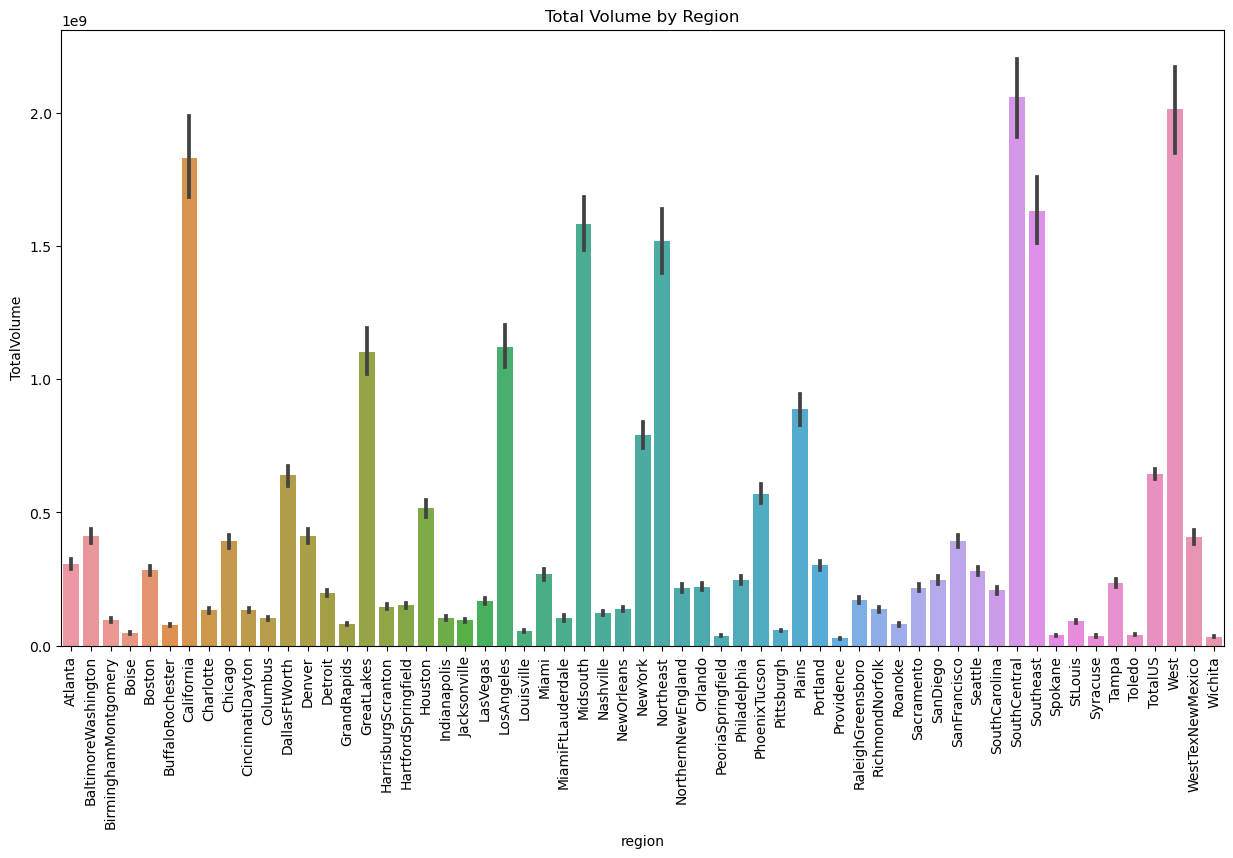

In [24]:
plt.figure(figsize=(15,8))
sns.barplot(x='region', y='TotalVolume', data=df_long, estimator=sum)
plt.xticks(rotation=90)
plt.title('Total Volume by Region')
plt.show()


##### Interpretation

>Average Price by Region

Price Distribution: 
The box plot shows the distribution of average prices across different regions. Each box represents the interquartile range (IQR), with the line inside the box indicating the 
median price.

Outliers: 
Points outside the whiskers are outliers, indicating regions with prices significantly higher or lower than the majority.

Regional Comparison:
 Regions like California and New York have higher average prices compared to regions like SouthCentral and WestTexNewMexico.

Variability: 
Some regions show a wider spread in prices, indicating higher variability, while others have a more consistent price range.

>Total Volume by Region

Highest Volume: 
The region with the highest total volume is California, followed closely by New York and Texas.

Lowest Volume:
 The regions with the lowest total volumes are Boise and Roanoke.

Variability:
 The error bars indicate variability in the data, with some regions showing more consistency in their total volumes than others.

Comparison: 
This graph allows for easy comparison of total volumes across different regions, highlighting significant differences and trends.

 ### Correlation Matrix
 
A correlation matrix helps identify the relationships between numerical variables

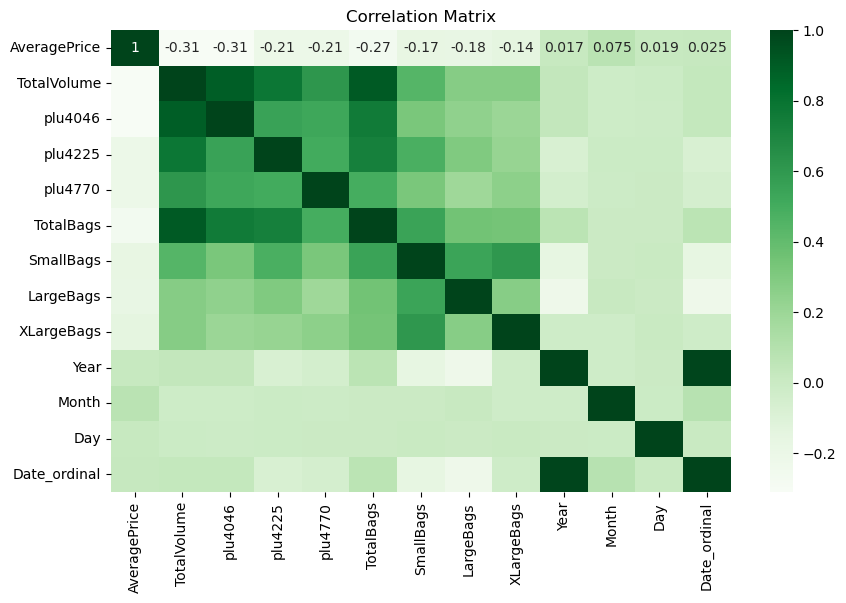

In [25]:
# Select only numeric columns for the correlation matrix
numeric_df = df_cleaned.select_dtypes(include=[np.number])

# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Greens')
plt.title('Correlation Matrix')
plt.show()


##### Interpretation

Positive Correlations: 
Variables like Total Volume, Total Bags, and Small Bags show strong positive correlations with each other, indicating that as one increases, the others tend to increase as well.

Negative Correlations: 
AveragePrice has a negative correlation with variables like Total Volume and Total Bags, suggesting that higher prices are associated with lower volumes and bag counts.

Weak Correlations: 
Variables such as Year, Month, and Day_ordinal show weak or no significant correlations with most other variables

<h2 id="modeling" style="color:darkgreen;">Modeling</h2>



In [26]:
df_cleaned['Year'] = pd.to_datetime(df_cleaned['Date']).dt.year
df_cleaned['Month'] = pd.to_datetime(df_cleaned['Date']).dt.month
df_cleaned['Day'] = pd.to_datetime(df_cleaned['Date']).dt.day

# Now drop the original 'Date' column
X = df_cleaned.drop(['AveragePrice', 'Date'], axis=1)

 ### Train-Test Split:

Split your data into training and test sets using train_test_split() from sklearn.

In [27]:
from sklearn.model_selection import train_test_split

X = df_cleaned.drop(columns=['AveragePrice'])  # Features
y = df_cleaned['AveragePrice']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#### Data Preparation for the models

In [28]:
# Convert Date column into year, month, and day
X_train['Year'] = X_train['Date'].dt.year
X_train['Month'] = X_train['Date'].dt.month
X_train['Day'] = X_train['Date'].dt.day

# Repeat for X_test if needed
X_test['Year'] = X_test['Date'].dt.year
X_test['Month'] = X_test['Date'].dt.month
X_test['Day'] = X_test['Date'].dt.day

# Drop the original Date column
X_train = X_train.drop(columns=['Date'], errors='ignore')
X_test = X_test.drop(columns=['Date'], errors='ignore')


In [29]:
X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes('bool').columns})
X_test = X_test.astype({col: 'int' for col in X_test.select_dtypes('bool').columns})

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
X_train['Year'] = X_train['Date'].dt.year
X_train['Month'] = X_train['Date'].dt.month
X_train['Day'] = X_train['Date'].dt.day
X_train['DayOfWeek'] = X_train['Date'].dt.dayofweek
X_train = X_train.drop(columns=['Date'])  # Remove the original datetime column

In [32]:
import pandas as pd

# Step 1: Generate 'DayOfWeek' in the test set from 'Date'
X_test['DayOfWeek'] = pd.to_datetime(X_test['Date']).dt.dayofweek

# Step 2: Drop 'Date' from the test set
X_test = X_test.drop(columns=['Date'])

# Step 3: Align the columns between training and testing sets
X_test = X_test.reindex(columns=X_train.columns)



In [33]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Random Forest Regressor

In [35]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Gradient Boosting Regressor

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

<h2 id="evaluation-and-validation" style="color:darkgreen;">Evaluation and Validation</h2>


#### LinearRegression

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the Linear Regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Print out the evaluation metrics
print("Linear Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"Mean Absolute Error (MAE): {mae_lr}")
print(f"R-squared (R²): {r2_lr}")


Linear Regression Model Performance:
Mean Squared Error (MSE): 0.4072339705714463
Mean Absolute Error (MAE): 0.49056309889090594
R-squared (R²): 0.5983559337674254


#### RandomForestRegressor

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest Regressor model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print out the evaluation metrics
print("Random Forest Regressor Model Performance:")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"R-squared (R²): {r2_rf}")


Random Forest Regressor Model Performance:
Mean Squared Error (MSE): 0.07324770589308044
Mean Absolute Error (MAE): 0.18985128766324075
R-squared (R²): 0.9277577300444215


#### Gradient Boosting Regressor

In [39]:
from sklearn.ensemble import GradientBoostingRegressor

# Create the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_model.predict(X_test)

# Evaluate the Gradient Boosting Regressor model
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regressor Model Performance:")
print(f"Mean Squared Error (MSE): {mse_gb}")
print(f"Mean Absolute Error (MAE): {mae_gb}")
print(f"R-squared (R²): {r2_gb}")


Gradient Boosting Regressor Model Performance:
Mean Squared Error (MSE): 0.27503189305613124
Mean Absolute Error (MAE): 0.4058621299351421
R-squared (R²): 0.7287433371147831


<h2 id="final-model" style="color:darkgreen;">Final Model</h2>


In [40]:
# Print out the performance of all models
print("Linear Regression Model Performance:")
print(f"MSE: {mse_lr}, MAE: {mae_lr}, R²: {r2_lr}")

print("\nGradient Boosting Regressor Model Performance:")
print(f"MSE: {mse_gb}, MAE: {mae_gb}, R²: {r2_gb}")

print("\nRandom Forest Regressor Model Performance:")
print(f"MSE: {mse_rf}, MAE: {mae_rf}, R²: {r2_rf}")


Linear Regression Model Performance:
MSE: 0.4072339705714463, MAE: 0.49056309889090594, R²: 0.5983559337674254

Gradient Boosting Regressor Model Performance:
MSE: 0.27503189305613124, MAE: 0.4058621299351421, R²: 0.7287433371147831

Random Forest Regressor Model Performance:
MSE: 0.07324770589308044, MAE: 0.18985128766324075, R²: 0.9277577300444215


Results:  

The Random Forest Regressor model outperformed all other models with the highest R² score (0.9278), lowest Mean Squared Error (MSE: 0.0732), and lowest Mean Absolute Error (MAE: 0.1899). Based on these metrics, we selected Random Forest Regressor as the final model for predicting avocado prices

####  Saving the Final Model

In [41]:
import joblib

# Save the model to a file
joblib.dump(rf_model, 'final_model_random_forest.pkl')

print("Final model saved as 'final_model_random_forest.pkl'")

Final model saved as 'final_model_random_forest.pkl'


<h2 id="conclusion-and-future-work" style="color:darkgreen;">Conclusion and Future Work</h2>

>Conclusion

In this project, we developed predictive models to analyze and forecast avocado prices based on various features such as region, type, and date. After evaluating multiple models, including Linear Regression, Gradient Boosting Regressor, and Random Forest Regressor, we found that the Random Forest Regressor outperformed the others, achieving an R-squared value of approximately 0.93. This indicates a strong correlation between the features and the target variable, suggesting that our model is capable of making reliable price predictions. Overall, this analysis provides valuable insights into the factors influencing avocado prices and can assist stakeholders in making informed decisions.

> Future Work

For future work, several avenues can be explored to enhance the analysis and improve model performance:

Feature Engineering: Incorporating additional features, such as weather data, economic indicators, and market trends, could provide more context and potentially lead to better predictions.

Hyperparameter Tuning: Implementing techniques like Grid Search or Random Search for hyperparameter optimization can further refine model performance.

Time Series Analysis: Since avocado prices may exhibit seasonal patterns, employing time series forecasting methods could yield more accurate predictions.

Deployment: Creating a web application or API for real-time price predictions would allow users to leverage the model's capabilities in practical scenarios.

Model Comparison: Evaluating other machine learning algorithms, such as XGBoost or neural networks, could provide additional insights and alternatives for price prediction

<h2 id="references" style="color:darkgreen;">References</h2>

Avocado Prices Dataset:

Kaggle: Avocado Prices